# Basic Analysis

In [1]:
!curl "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv" > aerofit_treadmill.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7279  100  7279    0     0      0      0 --:--:-- --:--:-- --:--:--     0   0     0  13621      0 --:--:-- --:--:-- --:--:-- 13708


In [1]:
import pandas as pd
df = pd.read_csv("aerofit_treadmill.csv")

In [3]:
df.shape

(180, 9)

In [4]:
df.head(1)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112


In [5]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [8]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [9]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [11]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Outlier detection

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

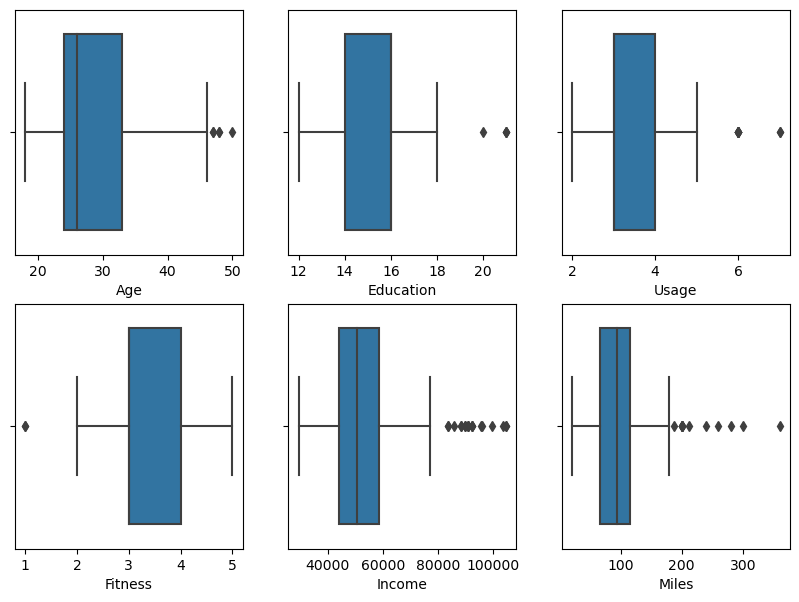

In [13]:
plt.figure(figsize=(10,7))
plt.subplot(2,3,1)
sns.boxplot(data=df,x='Age')
plt.subplot(2,3,2)
sns.boxplot(data=df,x='Education')
plt.subplot(2,3,3)
sns.boxplot(data=df,x='Usage')
plt.subplot(2,3,4)
sns.boxplot(data=df,x='Fitness')
plt.subplot(2,3,5)
sns.boxplot(data=df,x='Income')
plt.subplot(2,3,6)
sns.boxplot(data=df,x='Miles')
plt.show()


In [14]:
Q1 = df.describe()['Age']['25%']
Q3 = df.describe()['Age']['75%']
IQR = Q3-Q1
Up_limit = Q3+1.5*IQR
Lo_limit = Q1-1.5*IQR

<Axes: xlabel='Age'>

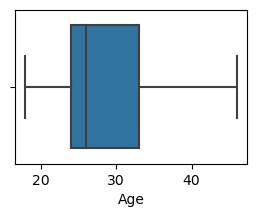

In [15]:
df_age = df.loc[(df['Age']>=Lo_limit) & (df['Age']<=Up_limit)]
plt.figure(figsize=(3,2))
sns.boxplot(data=df_age,x='Age')

# Impact of Gender,Marital Status ,Fitness on Product Purchase

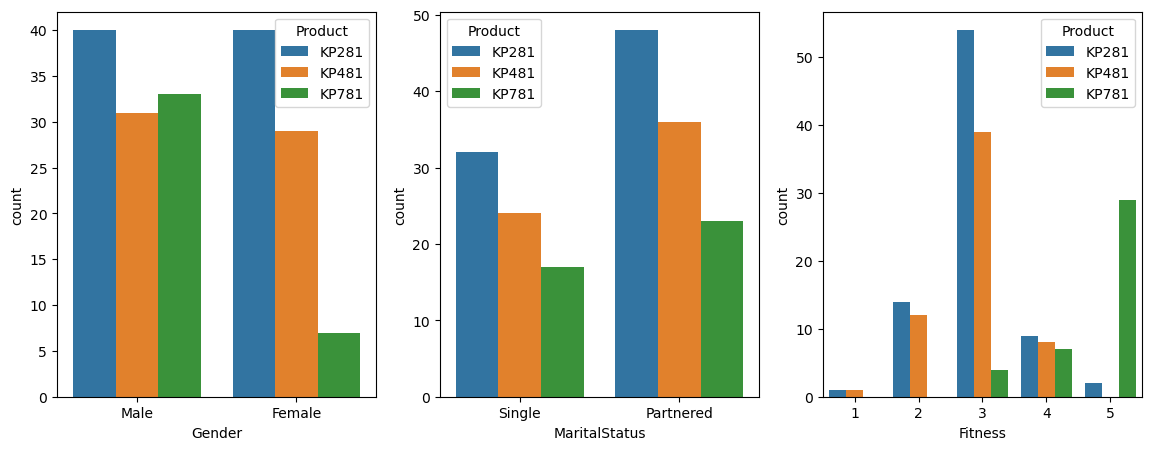

In [16]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.countplot(x='Gender',hue='Product',data=df)
plt.subplot(1,3,2)
sns.countplot(x='MaritalStatus',hue='Product',data=df)
plt.subplot(1,3,3)
sns.countplot(x='Fitness',hue='Product',data=df)
plt.show()

# Marginal,Joint and Conditional Probabilities for Age

In [17]:
Gen = pd.crosstab(df['Gender'],df['Product'],normalize=True,margins=True,margins_name='Total')
Gen

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
Total,0.444444,0.333333,0.222222,1.000000


In [18]:
# Marginal Probability
print("Probability that a new customer will buy KP281 treadmill :",round(Gen.loc['Total','KP281'],2))
print("Probability that a new customer will buy KP481 treadmill :",round(Gen.loc['Total','KP481'],2))
print("Probability that a new customer will buy KP781 treadmill :",round(Gen.loc['Total','KP781'],2))

Probability that a new customer will buy KP281 treadmill : 0.44
Probability that a new customer will buy KP481 treadmill : 0.33
Probability that a new customer will buy KP781 treadmill : 0.22


### For a random customer with unknown features, we recommend the KP281 model.

In [19]:
# Joint Probability
print("Probability that a customer is both male and buys the KP281 treadmill is :",round(Gen.loc['Male','KP281'],2))
print("Probability that a customer is both male and buys the KP481 treadmill is :",round(Gen.loc['Male','KP481'],2))
print("Probability that a customer is both male and buys the KP781 treadmill is :",round(Gen.loc['Male','KP781'],2),"\n")
# Joint Probability
print("Probability that a customer is both female and buys the KP281 treadmill is :",round(Gen.loc['Female','KP281'],2))
print("Probability that a customer is both female and buys the KP481 treadmill is :",round(Gen.loc['Female','KP481'],2))
print("Probability that a customer is both female and buys the KP781 treadmill is :",round(Gen.loc['Female','KP781'],2))

Probability that a customer is both male and buys the KP281 treadmill is : 0.22
Probability that a customer is both male and buys the KP481 treadmill is : 0.17
Probability that a customer is both male and buys the KP781 treadmill is : 0.18 

Probability that a customer is both female and buys the KP281 treadmill is : 0.22
Probability that a customer is both female and buys the KP481 treadmill is : 0.16
Probability that a customer is both female and buys the KP781 treadmill is : 0.04


In [20]:
# Conditional Probability
print("Probability of male customer buying KP281 treadmill :",
      f"{Gen.loc['Male','KP281']/Gen.loc['Male','Total']:.2f}")
print("Probability of male customer buying KP481 treadmill :",
      f"{Gen.loc['Male','KP481']/Gen.loc['Male','Total']:.2f}")
print("Probability of male customer buying KP781 treadmill :",
      f"{Gen.loc['Male','KP781']/Gen.loc['Male','Total']:.2f}","\n")
# Conditional Probability 
print("Probability of female customer buying KP281 treadmill :",
      f"{Gen.loc['Female','KP281']/Gen.loc['Female','Total']:.2f}")
print("Probability of female customer buying KP481 treadmill :",
      f"{Gen.loc['Female','KP481']/Gen.loc['Female','Total']:.2f}")
print("Probability of female customer buying KP781 treadmill :",
      f"{Gen.loc['Female','KP781']/Gen.loc['Female','Total']:.2f}")

Probability of male customer buying KP281 treadmill : 0.38
Probability of male customer buying KP481 treadmill : 0.30
Probability of male customer buying KP781 treadmill : 0.32 

Probability of female customer buying KP281 treadmill : 0.53
Probability of female customer buying KP481 treadmill : 0.38
Probability of female customer buying KP781 treadmill : 0.09


### For male customers, we recommend considering the KP281, KP781, and KP481 models in sequence. However, for female customers, we recommend KP281.

# Marginal,Joint and Conditional Probabilities for MaritalStatus¶

In [21]:
MS = pd.crosstab(df['MaritalStatus'],df['Product'],normalize=True,margins=True,margins_name='Total')
MS

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
Total,0.444444,0.333333,0.222222,1.000000


In [22]:
# Joint Probability Male
print("Probability that a new single customer will buy KP281 treadmill :",round(MS.loc['Single','KP281'],2))
print("Probability that a new single customer will buy KP481 treadmill :",round(MS.loc['Single','KP481'],2))
print("Probability that a new single customer will buy KP781 treadmill :",round(MS.loc['Single','KP781'],2),"\n")
# Joint Probability Female
print("Probability that a new Partnered customer will buy KP281 treadmill :",round(MS.loc['Partnered','KP281'],2))
print("Probability that a new Partnered customer will buy KP481 treadmill :",round(MS.loc['Partnered','KP481'],2))
print("Probability that a new Partnered customer will buy KP781 treadmill :",round(MS.loc['Partnered','KP781'],2))

Probability that a new single customer will buy KP281 treadmill : 0.18
Probability that a new single customer will buy KP481 treadmill : 0.13
Probability that a new single customer will buy KP781 treadmill : 0.09 

Probability that a new Partnered customer will buy KP281 treadmill : 0.27
Probability that a new Partnered customer will buy KP481 treadmill : 0.2
Probability that a new Partnered customer will buy KP781 treadmill : 0.13


In [23]:
# Conditional Probability
print("Probability of buying KP281 treadmill given that customer is a single individual :",
      f"{MS.loc['Single','KP281']/MS.loc['Single','Total']:.2f}")
print("Probability of buying KP481 treadmill given that customer is a single individual :",
      f"{MS.loc['Single','KP481']/MS.loc['Single','Total']:.2f}")
print("Probability of buying KP781 treadmill given that customer is a single individual :",
      f"{MS.loc['Single','KP781']/MS.loc['Single','Total']:.2f}","\n")
# Conditional Probability 
print("Probability of buying KP281 treadmill given that customer is a Partnered :",
      f"{MS.loc['Partnered','KP281']/MS.loc['Partnered','Total']:.2f}")
print("Probability of buying KP481 treadmill given that customer is a Partnered :",
      f"{MS.loc['Partnered','KP481']/MS.loc['Partnered','Total']:.2f}")
print("Probability of buying KP781 treadmill given that customer is a Partnered :",
      f"{MS.loc['Partnered','KP781']/MS.loc['Partnered','Total']:.2f}")


Probability of buying KP281 treadmill given that customer is a single individual : 0.44
Probability of buying KP481 treadmill given that customer is a single individual : 0.33
Probability of buying KP781 treadmill given that customer is a single individual : 0.23 

Probability of buying KP281 treadmill given that customer is a Partnered : 0.45
Probability of buying KP481 treadmill given that customer is a Partnered : 0.34
Probability of buying KP781 treadmill given that customer is a Partnered : 0.21


### Whether the customer is single or partnered (marital status) does not matter; we recommend the KP281 model.

# Impact of Fitness

In [24]:
FN = pd.crosstab(df['Fitness'],df['Product'],normalize=True,margins=True,margins_name='Total')
FN

Product,KP281,KP481,KP781,Total
Fitness,,,,
1,0.005556,0.005556,0.000000,0.011111
2,0.077778,0.066667,0.000000,0.144444
3,0.300000,0.216667,0.022222,0.538889
4,0.050000,0.044444,0.038889,0.133333
5,0.011111,0.000000,0.161111,0.172222
Total,0.444444,0.333333,0.222222,1.000000


In [25]:
# Conditional Probability
print("Probability of customer buying KP281 treadmill when their self-rated fitness level is 1 on a scale from 1 to 5:",
      f"{FN.loc[1,'KP281']/FN.loc[1,'Total']:.2f}")
print("Probability of customer buying KP481 treadmill when their self-rated fitness level is 1 on a scale from 1 to 5:",
      f"{FN.loc[1,'KP481']/FN.loc[1,'Total']:.2f}")
print("Probability of customer buying KP781 treadmill when their self-rated fitness level is 1 on a scale from 1 to 5:",
      f"{FN.loc[1,'KP781']/FN.loc[1,'Total']:.2f}","\n")

print("Probability of customer buying KP281 treadmill when their self-rated fitness level is 2 on a scale from 1 to 5:",
      f"{FN.loc[2,'KP281']/FN.loc[2,'Total']:.2f}")
print("Probability of customer buying KP481 treadmill when their self-rated fitness level is 2 on a scale from 1 to 5:",
      f"{FN.loc[2,'KP481']/FN.loc[2,'Total']:.2f}")
print("Probability of customer buying KP781 treadmill when their self-rated fitness level is 2 on a scale from 1 to 5:",
      f"{FN.loc[2,'KP781']/FN.loc[2,'Total']:.2f}","\n")

print("Probability of customer buying KP281 treadmill when their self-rated fitness level is 3 on a scale from 1 to 5:",
      f"{FN.loc[3,'KP281']/FN.loc[3,'Total']:.2f}")
print("Probability of customer buying KP481 treadmill when their self-rated fitness level is 3 on a scale from 1 to 5:",
      f"{FN.loc[3,'KP481']/FN.loc[3,'Total']:.2f}")
print("Probability of customer buying KP781 treadmill when their self-rated fitness level is 3 on a scale from 1 to 5:",
      f"{FN.loc[3,'KP781']/FN.loc[3,'Total']:.2f}","\n")

print("Probability of customer buying KP281 treadmill when their self-rated fitness level is 4 on a scale from 1 to 5:",
      f"{FN.loc[4,'KP281']/FN.loc[4,'Total']:.2f}")
print("Probability of customer buying KP481 treadmill when their self-rated fitness level is 4 on a scale from 1 to 5:",
      f"{FN.loc[4,'KP481']/FN.loc[4,'Total']:.2f}")
print("Probability of customer buying KP781 treadmill when their self-rated fitness level is 4 on a scale from 1 to 5:",
      f"{FN.loc[4,'KP781']/FN.loc[4,'Total']:.2f}","\n")

print("Probability of customer buying KP281 treadmill when their self-rated fitness level is 5 on a scale from 1 to 5:",
      f"{FN.loc[5,'KP281']/FN.loc[5,'Total']:.2f}")
print("Probability of customer buying KP481 treadmill when their self-rated fitness level is 5 on a scale from 1 to 5:",
      f"{FN.loc[5,'KP481']/FN.loc[5,'Total']:.2f}")
print("Probability of customer buying KP781 treadmill when their self-rated fitness level is 5 on a scale from 1 to 5:",
      f"{FN.loc[5,'KP781']/FN.loc[5,'Total']:.2f}")


Probability of customer buying KP281 treadmill when their self-rated fitness level is 1 on a scale from 1 to 5: 0.50
Probability of customer buying KP481 treadmill when their self-rated fitness level is 1 on a scale from 1 to 5: 0.50
Probability of customer buying KP781 treadmill when their self-rated fitness level is 1 on a scale from 1 to 5: 0.00 

Probability of customer buying KP281 treadmill when their self-rated fitness level is 2 on a scale from 1 to 5: 0.54
Probability of customer buying KP481 treadmill when their self-rated fitness level is 2 on a scale from 1 to 5: 0.46
Probability of customer buying KP781 treadmill when their self-rated fitness level is 2 on a scale from 1 to 5: 0.00 

Probability of customer buying KP281 treadmill when their self-rated fitness level is 3 on a scale from 1 to 5: 0.56
Probability of customer buying KP481 treadmill when their self-rated fitness level is 3 on a scale from 1 to 5: 0.40
Probability of customer buying KP781 treadmill when their se

### If the customer self-rates their fitness level as 1 or 2, we recommend the KP281 or KP481 model.If the customer self-rates their fitness level as 3 or 4, we recommend the KP281 model.If the customer self-rates their fitness level as 5, we recommend the KP781 model.

# Imapct of Age Groups

In [26]:
bins = [17, 30, 40, 100]
labels = ['Young Adult', 'Adult', 'Senior']
df['Age_Bins'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [27]:
df['Age_Bins'].value_counts()

Young Adult    120
Adult           48
Senior          12
Name: Age_Bins, dtype: int64

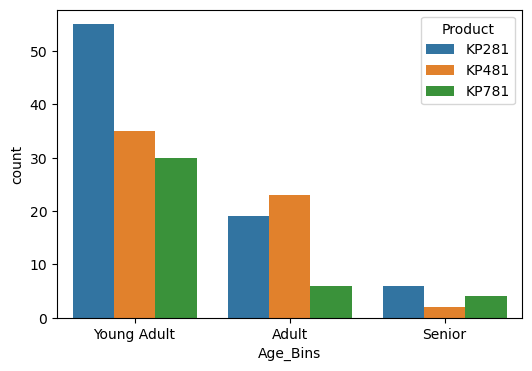

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='Age_Bins',data=df,hue='Product')
plt.show()

In [29]:
Age = pd.crosstab(df['Age_Bins'],df['Product'],normalize=True,margins=True,margins_name='Total')
Age

Product,KP281,KP481,KP781,Total
Age_Bins,,,,
Young Adult,0.305556,0.194444,0.166667,0.666667
Adult,0.105556,0.127778,0.033333,0.266667
Senior,0.033333,0.011111,0.022222,0.066667
Total,0.444444,0.333333,0.222222,1.000000


In [30]:
# Joint Probability Male
# 17-30--->Young Adult
# 30-40--->Adult
# 40-100-->Senior
print("Probability that a young adult customer will buy KP281 treadmill :",round(Age.loc['Young Adult','KP281'],2))
print("Probability that a young adult customer will buy KP481 treadmill :",round(Age.loc['Young Adult','KP481'],2))
print("Probability that a young adult customer will buy KP781 treadmill :",round(Age.loc['Young Adult','KP781'],2),"\n")
# Joint Probability Female
print("Probability that a adult customer will buy KP281 treadmill :",round(Age.loc['Adult','KP281'],2))
print("Probability that a adult customer will buy KP481 treadmill :",round(Age.loc['Adult','KP481'],2))
print("Probability that a adult customer will buy KP781 treadmill :",round(Age.loc['Adult','KP781'],2),"\n")

# Joint Probability Female
print("Probability that a senior customer will buy KP281 treadmill :",round(Age.loc['Senior','KP281'],2))
print("Probability that a senior customer will buy KP481 treadmill :",round(Age.loc['Senior','KP481'],2))
print("Probability that a senior customer will buy KP781 treadmill :",round(Age.loc['Senior','KP781'],2))

Probability that a young adult customer will buy KP281 treadmill : 0.31
Probability that a young adult customer will buy KP481 treadmill : 0.19
Probability that a young adult customer will buy KP781 treadmill : 0.17 

Probability that a adult customer will buy KP281 treadmill : 0.11
Probability that a adult customer will buy KP481 treadmill : 0.13
Probability that a adult customer will buy KP781 treadmill : 0.03 

Probability that a senior customer will buy KP281 treadmill : 0.03
Probability that a senior customer will buy KP481 treadmill : 0.01
Probability that a senior customer will buy KP781 treadmill : 0.02


In [31]:
# Conditional Probability
print("Probability of buying KP281 treadmill given that customer is a young adult :",
      f"{Age.loc['Young Adult','KP281']/Age.loc['Young Adult','Total']:.2f}")
print("Probability of buying KP481 treadmill given that customer is a young adult :",
      f"{Age.loc['Young Adult','KP481']/Age.loc['Young Adult','Total']:.2f}")
print("Probability of buying KP781 treadmill given that customer is a young adult :",
      f"{Age.loc['Young Adult','KP781']/Age.loc['Young Adult','Total']:.2f}","\n")

# Conditional Probability 
print("Probability of buying KP281 treadmill given that customer is a adult :",
      f"{Age.loc['Adult','KP281']/Age.loc['Adult','Total']:.2f}")
print("Probability of buying KP481 treadmill given that customer is a adult :",
      f"{Age.loc['Adult','KP481']/Age.loc['Adult','Total']:.2f}")
print("Probability of buying KP781 treadmill given that customer is a adult :",
      f"{Age.loc['Adult','KP781']/Age.loc['Adult','Total']:.2f}","\n")

# Conditional Probability 
print("Probability of buying KP281 treadmill given that customer is a senior :",
      f"{Age.loc['Senior','KP281']/Age.loc['Senior','Total']:.2f}")
print("Probability of buying KP481 treadmill given that customer is a senior :",
      f"{Age.loc['Senior','KP481']/Age.loc['Senior','Total']:.2f}")
print("Probability of buying KP781 treadmill given that customer is a senior :",
      f"{Age.loc['Senior','KP781']/Age.loc['Senior','Total']:.2f}")

Probability of buying KP281 treadmill given that customer is a young adult : 0.46
Probability of buying KP481 treadmill given that customer is a young adult : 0.29
Probability of buying KP781 treadmill given that customer is a young adult : 0.25 

Probability of buying KP281 treadmill given that customer is a adult : 0.40
Probability of buying KP481 treadmill given that customer is a adult : 0.48
Probability of buying KP781 treadmill given that customer is a adult : 0.12 

Probability of buying KP281 treadmill given that customer is a senior : 0.50
Probability of buying KP481 treadmill given that customer is a senior : 0.17
Probability of buying KP781 treadmill given that customer is a senior : 0.33


### Young adults, aged 17-30, are more inclined to purchase the KP281 model.Adults in the 30-40 age range are more likely to prefer the KP481 model.Senior customers, aged 40-100, are more inclined to opt for the KP281 model.

# Impact of Education

In [32]:
education_bins = [11, 16, 18, 21]
bin_labels = ['School', 'High School', 'Graduate']
df['Edu_Bins'] = pd.cut(df['Education'], bins=education_bins, labels=bin_labels)

In [33]:
df['Edu_Bins'].value_counts()

School         153
High School     23
Graduate         4
Name: Edu_Bins, dtype: int64

In [34]:
(df.Education>16).sum()

27

<Axes: xlabel='Edu_Bins', ylabel='count'>

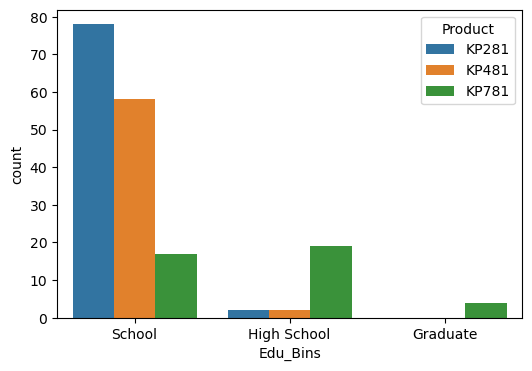

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Edu_Bins',hue='Product')

In [36]:
Edu = pd.crosstab(df['Edu_Bins'],df['Product'],normalize=True,margins=True,margins_name='Total')
Edu

Product,KP281,KP481,KP781,Total
Edu_Bins,,,,
School,0.433333,0.322222,0.094444,0.850000
High School,0.011111,0.011111,0.105556,0.127778
Graduate,0.000000,0.000000,0.022222,0.022222
Total,0.444444,0.333333,0.222222,1.000000


In [37]:
# Joint Probability 
# 11-16--->School
# 16-18--->High School
# 18-21--->Graduate
print("Probability that a customer with an education level of 'School' will buy KP281 treadmill :",
      round(Edu.loc['School','KP281'],2))
print("Probability that a customer with an education level of 'School' will buy KP481 treadmill :",
      round(Edu.loc['School','KP481'],2))
print("Probability that a customer with an education level of 'School' will buy KP781 treadmill :",
      round(Edu.loc['School','KP781'],2),"\n")
# Joint Probability 
print("Probability that a customer with an education level of 'High School' will buy KP281 treadmill :",
      round(Edu.loc['High School','KP281'],2))
print("Probability that a customer with an education level of 'High School' will buy KP481 treadmill :",
      round(Edu.loc['High School','KP481'],2))
print("Probability that a customer with an education level of 'High School' will buy KP781 treadmill :",
      round(Edu.loc['High School','KP781'],2),"\n")

# Joint Probability 
print("Probability that a customer with an education level of 'Graduate' will buy KP281 treadmill :",
      round(Edu.loc['Graduate','KP281'],2))
print("Probability that a customer with an education level of 'Graduate' will buy KP481 treadmill :",
      round(Edu.loc['Graduate','KP481'],2))
print("Probability that a customer with an education level of 'Graduate' will buy KP781 treadmill :",
      round(Edu.loc['Graduate','KP781'],2))

Probability that a customer with an education level of 'School' will buy KP281 treadmill : 0.43
Probability that a customer with an education level of 'School' will buy KP481 treadmill : 0.32
Probability that a customer with an education level of 'School' will buy KP781 treadmill : 0.09 

Probability that a customer with an education level of 'High School' will buy KP281 treadmill : 0.01
Probability that a customer with an education level of 'High School' will buy KP481 treadmill : 0.01
Probability that a customer with an education level of 'High School' will buy KP781 treadmill : 0.11 

Probability that a customer with an education level of 'Graduate' will buy KP281 treadmill : 0.0
Probability that a customer with an education level of 'Graduate' will buy KP481 treadmill : 0.0
Probability that a customer with an education level of 'Graduate' will buy KP781 treadmill : 0.02


In [38]:
# Conditional Probability
print("Probability of buying KP281 treadmill given that his/her education level is 'School'",
      f"{Edu.loc['School','KP281']/Edu.loc['School','Total']:.2f}")
print("Probability of buying KP481 treadmill given that his/her education level is 'School'",
      f"{Edu.loc['School','KP481']/Edu.loc['School','Total']:.2f}")
print("Probability of buying KP781 treadmill given that his/her education level is 'School'",
      f"{Edu.loc['School','KP781']/Edu.loc['School','Total']:.2f}","\n")

# Conditional Probability 
print("Probability of buying KP281 treadmill given that his/her education level is 'High School'",
      f"{Edu.loc['High School','KP281']/Edu.loc['High School','Total']:.2f}")
print("Probability of buying KP481 treadmill given that his/her education level is 'High School'",
      f"{Edu.loc['High School','KP481']/Edu.loc['High School','Total']:.2f}")
print("Probability of buying KP781 treadmill given that his/her education level is 'High School'",
      f"{Edu.loc['High School','KP781']/Edu.loc['High School','Total']:.2f}","\n")

# Conditional Probability 
print("Probability of buying KP281 treadmill given that his/her education level is 'Graduate'",
      f"{Edu.loc['Graduate','KP281']/Edu.loc['Graduate','Total']:.2f}")
print("Probability of buying KP481 treadmill given that his/her education level is 'Graduate'",
      f"{Edu.loc['Graduate','KP481']/Edu.loc['Graduate','Total']:.2f}")
print("Probability of buying KP781 treadmill given that his/her education level is 'Graduate'",
      f"{Edu.loc['Graduate','KP781']/Edu.loc['Graduate','Total']:.2f}")

Probability of buying KP281 treadmill given that his/her education level is 'School' 0.51
Probability of buying KP481 treadmill given that his/her education level is 'School' 0.38
Probability of buying KP781 treadmill given that his/her education level is 'School' 0.11 

Probability of buying KP281 treadmill given that his/her education level is 'High School' 0.09
Probability of buying KP481 treadmill given that his/her education level is 'High School' 0.09
Probability of buying KP781 treadmill given that his/her education level is 'High School' 0.83 

Probability of buying KP281 treadmill given that his/her education level is 'Graduate' 0.00
Probability of buying KP481 treadmill given that his/her education level is 'Graduate' 0.00
Probability of buying KP781 treadmill given that his/her education level is 'Graduate' 1.00


### Customers with an education level of 'School' are more likely to choose the KP281 model.Customers with an education level of 'High School' are more inclined to choose for the KP781 model.Customers with an education level of 'Graduate' have a higher likelihood of choosing the KP781 model.

# Impact of Usage Frequencies

In [39]:
#Infrequent Users : planning to use treadmill 1-3 days per week
# Frequent Users : planning to use treadmill 4-7 days per week
usage_bins = [1, 3, 7]
bin_labels = ['Infrequent Users','Frequent Users']
df['Usage_Bins'] = pd.cut(df['Usage'], bins=usage_bins, labels=bin_labels)

In [40]:
df['Usage_Bins'].value_counts()

Infrequent Users    102
Frequent Users       78
Name: Usage_Bins, dtype: int64

<Axes: xlabel='Usage_Bins', ylabel='count'>

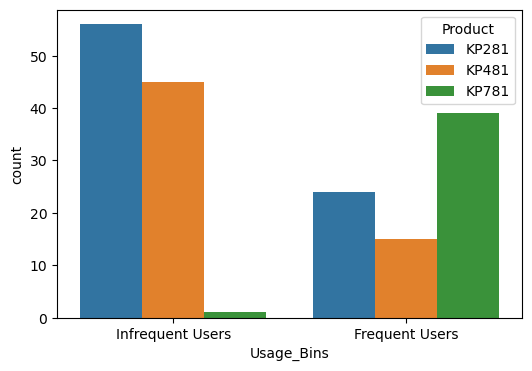

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Usage_Bins',hue='Product')

In [42]:
Use = pd.crosstab(df['Usage_Bins'],df['Product'],normalize=True,margins=True,margins_name='Total')
Use

Product,KP281,KP481,KP781,Total
Usage_Bins,,,,
Infrequent Users,0.311111,0.250000,0.005556,0.566667
Frequent Users,0.133333,0.083333,0.216667,0.433333
Total,0.444444,0.333333,0.222222,1.000000


In [43]:
# Conditional Probability
print("Probability of buying KP281 treadmill given that customers is planning to use treadmill frequently",
      f"{Use.loc['Frequent Users','KP281']/Use.loc['Frequent Users','Total']:.2f}")
print("Probability of buying KP481 treadmill given that customers is planning to use treadmill frequently",
      f"{Use.loc['Frequent Users','KP481']/Use.loc['Frequent Users','Total']:.2f}")
print("Probability of buying KP781 treadmill given that customers is planning to use treadmill frequently",
      f"{Use.loc['Frequent Users','KP781']/Use.loc['Frequent Users','Total']:.2f}","\n")

# Conditional Probability 
print("Probability of buying KP281 treadmill given that customers is planning to use treadmill 1-3 days per week",
      f"{Use.loc['Infrequent Users','KP281']/Use.loc['Infrequent Users','Total']:.2f}")
print("Probability of buying KP481 treadmill given that customers is planning to use treadmill 1-3 days per week",
      f"{Use.loc['Infrequent Users','KP481']/Use.loc['Infrequent Users','Total']:.2f}")
print("Probability of buying KP781 treadmill given that customers is planning to use treadmill 1-3 days per week",
      f"{Use.loc['Infrequent Users','KP781']/Use.loc['Infrequent Users','Total']:.2f}","\n")

Probability of buying KP281 treadmill given that customers is planning to use treadmill frequently 0.31
Probability of buying KP481 treadmill given that customers is planning to use treadmill frequently 0.19
Probability of buying KP781 treadmill given that customers is planning to use treadmill frequently 0.50 

Probability of buying KP281 treadmill given that customers is planning to use treadmill 1-3 days per week 0.55
Probability of buying KP481 treadmill given that customers is planning to use treadmill 1-3 days per week 0.44
Probability of buying KP781 treadmill given that customers is planning to use treadmill 1-3 days per week 0.01 



### Customers planning to use the treadmill frequently (4-7 days per week) are more likely to buy the KP781 model.Customers planning to use the treadmill not frequently (1-3 days per week) are more likely to buy the KP281 model.

# Impact of Income

In [44]:
#Low Income Group : 28K-50K
#Middle Income Group : 50K-75K
#Low Income Group : 75K-120K

income_bins = [28000, 50000, 75000, 120000]
bin_labels = ['Low','Middle','High']
df['Income_Bins'] = pd.cut(df['Income'], bins=income_bins, labels=bin_labels)

In [45]:
df.Income_Bins.value_counts()

Low       83
Middle    76
High      21
Name: Income_Bins, dtype: int64

<Axes: xlabel='Income_Bins', ylabel='count'>

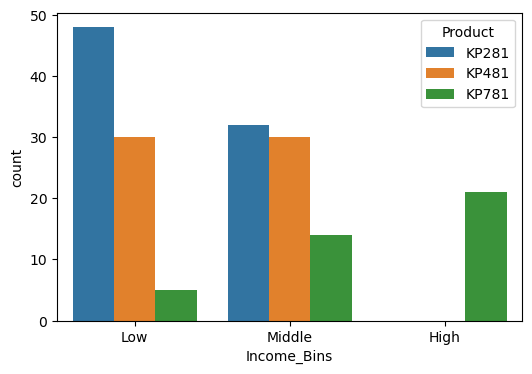

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Income_Bins',hue='Product')

In [47]:
Inc = pd.crosstab(df['Income_Bins'],df['Product'],normalize=True,margins=True,margins_name='Total')
Inc

Product,KP281,KP481,KP781,Total
Income_Bins,,,,
Low,0.266667,0.166667,0.027778,0.461111
Middle,0.177778,0.166667,0.077778,0.422222
High,0.000000,0.000000,0.116667,0.116667
Total,0.444444,0.333333,0.222222,1.000000


In [48]:
# Conditional Probability
print("Probability of a customer in the low-income group buying the KP281 treadmill",
      f"{Inc.loc['Low','KP281']/Inc.loc['Low','Total']:.2f}")
print("Probability of a customer in the low-income group buying the KP481 treadmill",
      f"{Inc.loc['Low','KP481']/Inc.loc['Low','Total']:.2f}")
print("Probability of a customer in the low-income group buying the KP781 treadmill",
      f"{Inc.loc['Low','KP781']/Inc.loc['Low','Total']:.2f}","\n")

# Conditional Probability 
print("Probability of a customer in the middle-income group buying the KP281 treadmill",
      f"{Inc.loc['Middle','KP281']/Inc.loc['Middle','Total']:.2f}")
print("Probability of a customer in the middle-income group buying the KP481 treadmill",
      f"{Inc.loc['Middle','KP481']/Inc.loc['Middle','Total']:.2f}")
print("Probability of a customer in the middle-income group buying the KP781 treadmill",
      f"{Inc.loc['Middle','KP781']/Inc.loc['Middle','Total']:.2f}","\n")

# Conditional Probability 
print("Probability of a customer in the high-income group buying the KP281 treadmill",
      f"{Inc.loc['High','KP281']/Inc.loc['High','Total']:.2f}")
print("Probability of a customer in the high-income group buying the KP481 treadmill",
      f"{Inc.loc['High','KP481']/Inc.loc['High','Total']:.2f}")
print("Probability of a customer in the high-income group buying the KP781 treadmill",
      f"{Inc.loc['High','KP781']/Inc.loc['High','Total']:.2f}","\n")

Probability of a customer in the low-income group buying the KP281 treadmill 0.58
Probability of a customer in the low-income group buying the KP481 treadmill 0.36
Probability of a customer in the low-income group buying the KP781 treadmill 0.06 

Probability of a customer in the middle-income group buying the KP281 treadmill 0.42
Probability of a customer in the middle-income group buying the KP481 treadmill 0.39
Probability of a customer in the middle-income group buying the KP781 treadmill 0.18 

Probability of a customer in the high-income group buying the KP281 treadmill 0.00
Probability of a customer in the high-income group buying the KP481 treadmill 0.00
Probability of a customer in the high-income group buying the KP781 treadmill 1.00 



### Customers in the low or middle-income group are more likely to buy the KP281 treadmill.Customers in the high-income group are highly likely to buy the KP781 treadmill.

# Impact of Running Mileage per week

In [49]:
# Low Mileage Group: 20-100 miles per week
# Moderate Mileage Group : 100-200 miles per week
# High Mileage Group : 200-370 miles per week
mile_bins = [20, 80, 150, 370]
bin_labels = ['Low Mileage','Moderate Mileage','High Mileage']
df['Mileage_Bins'] = pd.cut(df['Miles'], bins=mile_bins, labels=bin_labels)

In [50]:
df.Mileage_Bins.value_counts()

Moderate Mileage    92
Low Mileage         60
High Mileage        28
Name: Mileage_Bins, dtype: int64

<Axes: xlabel='Mileage_Bins', ylabel='count'>

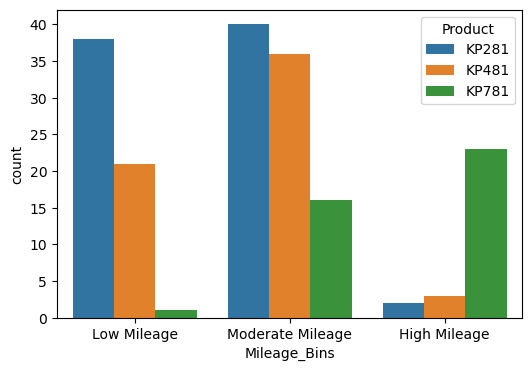

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Mileage_Bins',hue='Product')

In [52]:
Mil = pd.crosstab(df['Mileage_Bins'],df['Product'],normalize=True,margins=True,margins_name='Total')
Mil

Product,KP281,KP481,KP781,Total
Mileage_Bins,,,,
Low Mileage,0.211111,0.116667,0.005556,0.333333
Moderate Mileage,0.222222,0.200000,0.088889,0.511111
High Mileage,0.011111,0.016667,0.127778,0.155556
Total,0.444444,0.333333,0.222222,1.000000


In [53]:
# Conditional Probability
print("Probability of a customer in the low-mileage group buying the KP281 treadmill",
      f"{Mil.loc['Low Mileage','KP281']/Mil.loc['Low Mileage','Total']:.2f}")
print("Probability of a customer in the low-mileage group buying the KP481 treadmill",
      f"{Mil.loc['Low Mileage','KP481']/Mil.loc['Low Mileage','Total']:.2f}")
print("Probability of a customer in the low-mileage group buying the KP781 treadmill",
      f"{Mil.loc['Low Mileage','KP781']/Mil.loc['Low Mileage','Total']:.2f}","\n")

# Conditional Probability
print("Probability of a customer in the Moderate Mileage group buying the KP281 treadmill",
      f"{Mil.loc['Moderate Mileage','KP281']/Mil.loc['Moderate Mileage','Total']:.2f}")
print("Probability of a customer in the Moderate Mileage group buying the KP481 treadmill",
      f"{Mil.loc['Moderate Mileage','KP481']/Mil.loc['Moderate Mileage','Total']:.2f}")
print("Probability of a customer in the Moderate Mileage group buying the KP781 treadmill",
      f"{Mil.loc['Moderate Mileage','KP781']/Mil.loc['Moderate Mileage','Total']:.2f}","\n")

# Conditional Probability
print("Probability of a customer in the High Mileage group buying the KP281 treadmill",
      f"{Mil.loc['High Mileage','KP281']/Mil.loc['High Mileage','Total']:.2f}")
print("Probability of a customer in the High Mileage group buying the KP481 treadmill",
      f"{Mil.loc['High Mileage','KP481']/Mil.loc['High Mileage','Total']:.2f}")
print("Probability of a customer in the High Mileage group buying the KP781 treadmill",
      f"{Mil.loc['High Mileage','KP781']/Mil.loc['High Mileage','Total']:.2f}","\n")

Probability of a customer in the low-mileage group buying the KP281 treadmill 0.63
Probability of a customer in the low-mileage group buying the KP481 treadmill 0.35
Probability of a customer in the low-mileage group buying the KP781 treadmill 0.02 

Probability of a customer in the Moderate Mileage group buying the KP281 treadmill 0.43
Probability of a customer in the Moderate Mileage group buying the KP481 treadmill 0.39
Probability of a customer in the Moderate Mileage group buying the KP781 treadmill 0.17 

Probability of a customer in the High Mileage group buying the KP281 treadmill 0.07
Probability of a customer in the High Mileage group buying the KP481 treadmill 0.11
Probability of a customer in the High Mileage group buying the KP781 treadmill 0.82 



### Customers in the low or moderate mileage group are more likely to buy the KP281 treadmill.Customers in the high mileage group are highly likely to buy the KP781 treadmill.

/var/folders/gl/zbf433gs6b75qbzj5_m0fgm00000gn/T/ipykernel_5200/3170444083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


<Axes: >

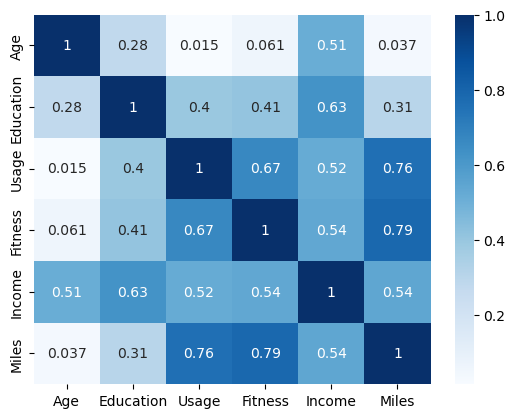

In [54]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

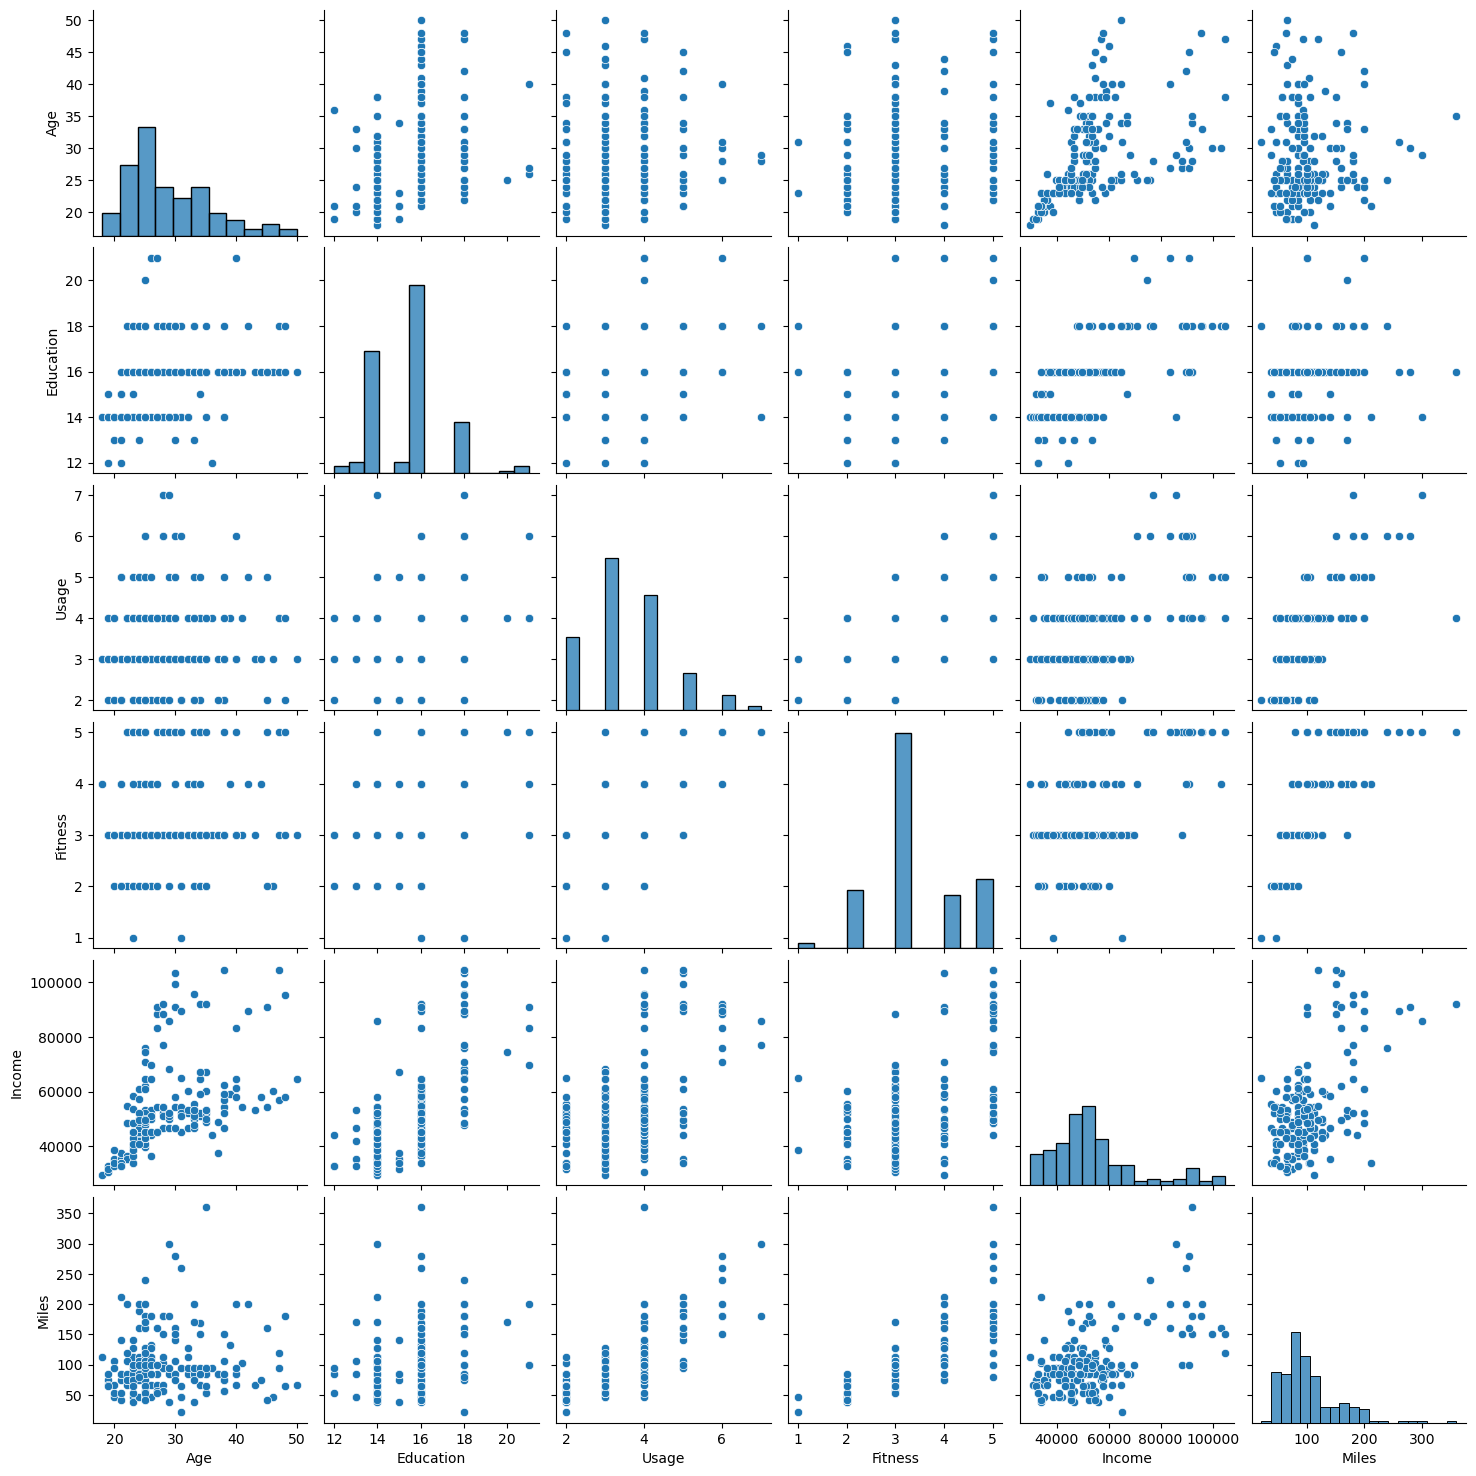

In [55]:
sns.pairplot(df)

In [2]:
# Problem Statement :
# To optimise product recommendations for a range of potential customers interested in purchasing treadmills, we aim to develop a personalised recommendation system based on various customer attributes, including gender, age, education level, fitness level, marital status, planned treadmill usage, and income group. The goal is to identify the most suitable treadmill model (KP281, KP781, or KP481) for each customer based on their unique profile, thereby improving customer satisfaction and increasing the likelihood of successful purchases.

# After Analysis of dataset for Aerofit, we have got following Insights
# For a random customer with unknown features, we recommend the KP281 model.
# For male customers, we recommend considering the KP281, KP781, and KP481 models in sequence. However, for female customers, we recommend KP281.
# Whether the customer is single or partnered (marital status) does not matter; we recommend the KP281 model.
# If the customer self-rates their fitness level as 1 or 2, we recommend the KP281 or KP481 model.If the customer self-rates their fitness level as 3 or 4, we recommend the KP281 model.If the customer self-rates their fitness level as 5, we recommend the KP781 model.
# Young adults, aged 17-30, are more inclined to purchase the KP281 model.Adults in the 30-40 age range are more likely to prefer the KP481 model.Senior customers, aged 40-100, are more inclined to opt for the KP281 model.
# Customers with an education level of 'School' are more likely to choose the KP281 model.Customers with an education level of 'High School' are more inclined to choose for the KP781 model.Customers with an education level of 'Graduate' have a higher likelihood of choosing the KP781 model.
# Customers planning to use the treadmill frequently (4-7 days per week) are more likely to buy the KP781 model.Customers planning to use the treadmill not frequently (1-3 days per week) are more likely to buy the KP281 model.
# Customers in the low or middle-income group are more likely to buy the KP281 treadmill.Customers in the high-income group are highly likely to buy the KP781 treadmill.
# Customers in the low or moderate mileage group are more likely to buy the KP281 treadmill.Customers in the high mileage group are highly likely to buy the KP781 treadmill.